# Número CFL en la ecuación de Burgers invísida

En el notebook "Conveccion no linear, ecuacion de Burgers invisida" se vió cómo variaba la forma de la solución númerica en función de los parámetros $\Delta x$ y $\Delta t$. En efecto la convergencia del método empleado depende directamente con los  parámetros $\Delta x$ y $\Delta t$.

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

Para el caso de la convección 1D retomemos parte del código para ver el efecto que tiene cambiar el valor de $\Delta x$

In [13]:
def linearconv(nx):
    dx = 2./(nx-1)
    nt = 10
    dt = .01
    c = 1

    u = ones(nx)
    u[int(.2/dx) : int(0.5/dx+1)]=2
    
    figure(figsize=(8, 4))
    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = 0',color='b');
    
    un = ones(nx)
    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1])

    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = '+str(nt*dt),color='r');
    ylim(1,2.2)
    legend()

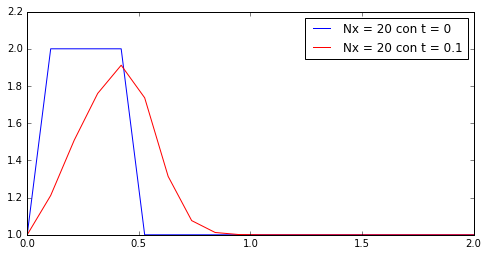

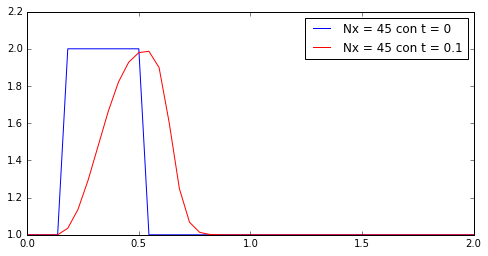

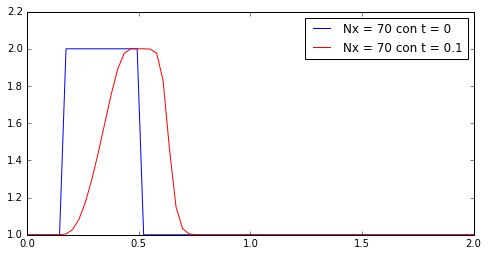

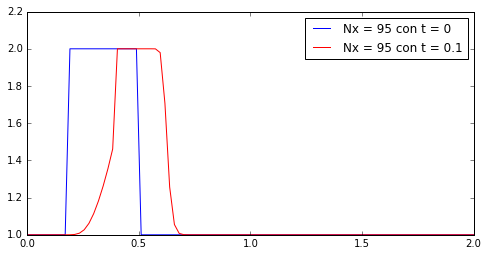

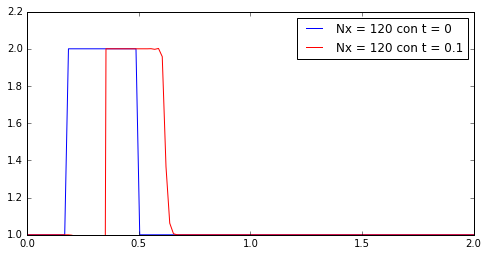

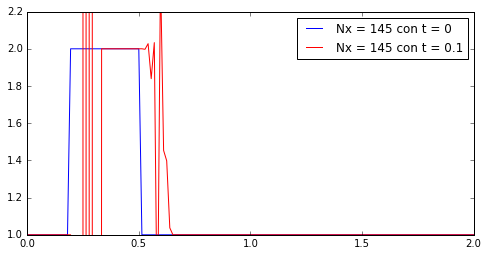

In [14]:
for nx in range(20, 150, 25): linearconv(nx)

Para responder que es lo que está pasando debemos de enfocarnos en como se estáimplementando el código. 

Sabemos que la
solución de la ecuación de convección y la ecuación invísida de Burgers son en general ecuaciones de transporte de una onda, por lo tanto le podemos asignar una velocidad de propagación. 

El problema al discretizar tanto el espacio como el tiempo es cuando la distancia que recorre la onda en el tiempo $\Delta t$ sobre pasa la discretización en el espacio, $\Delta x$. 

De forma que se puede asegurar la estabilidad del método si se recurre a un proceso adaptativo donde en cada paso se varíe el $\Delta t$ en función de la velocidad de la onda en cada tiempo.

Así definimos $$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{max} = \frac{u_{max} \Delta t}{\Delta x}$$

Donde $u$ es la velocidad de la onda, $\sigma$ se llama el número de Courant y el valor máximo $\sigma_{max}$ es un valor que asegura que el método sea estable en toda la malla.

In [27]:
def linearconv_CFL(nx):
    dx = 2./(nx-1)
    nt = 20
    c = 0.5
    sigma = 0.8
    
    u = ones(nx)
    u[int(.2/dx) : int(0.5/dx+1)]=2
    
    figure(figsize=(8, 4))
    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = 0',color='b');
    
    t=0
    un = ones(nx)
    while(t<=0.9):
        un = u.copy()
        dt = dx*sigma/max(un)
        for i in range(1,nx):
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

        t+=dt

    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = '+str(trunc(10*t)/10),color='r');
    ylim(1,2.2)
    legend()

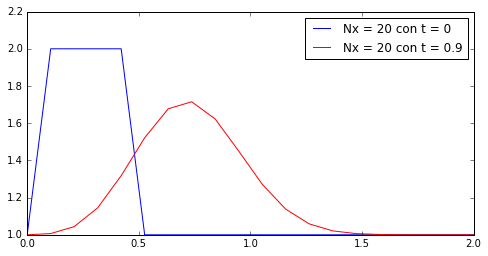

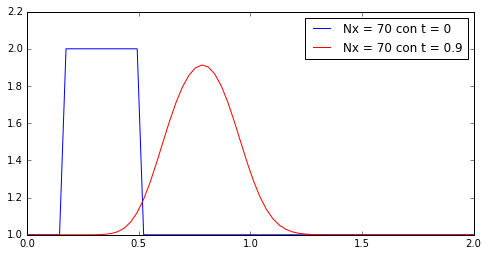

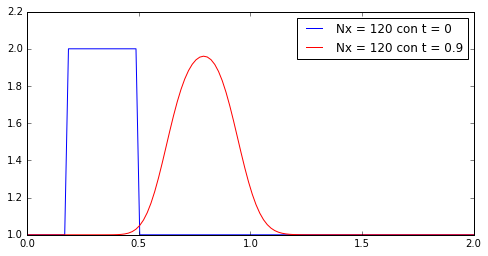

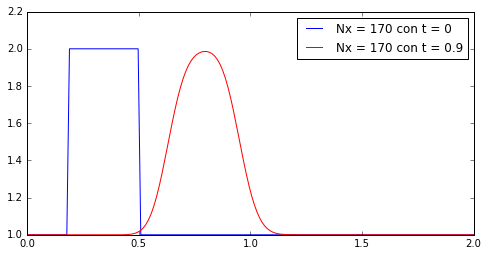

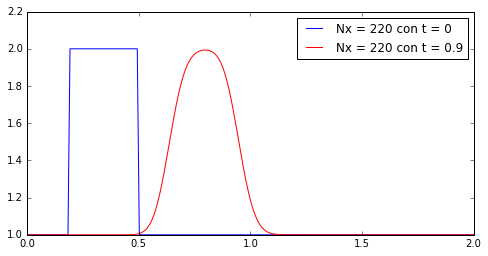

In [28]:
for nx in range(20, 230, 50): linearconv_CFL(nx)